In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv('diabetes.csv')

data.info()
print(data.head(1))

# Display basic statistics of the dataset
print("Basic Statistics of the Dataset:")
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
Basic S

In [3]:
data = pd.read_csv('diabetes.csv', header=0)
# Separate features (X) and target variable (y)
X = data.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=104,  test_size=0.3,  shuffle=True) 

# Print out train and test sets
print('X_train : ') 
print(X_train.head()) 
print('') 
print('X_test : ') 
print(X_test.head()) 
print('') 
print('y_train : ') 
print(y_train.head()) 
print('') 
print('y_test : ') 
print(y_test.head())

# Check null values in the training dataset
print("\n2. Null values in the training dataset:")
print(X_train.isnull().sum())

# Drop the whole row of any null values in the training dataset
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Adjust y_train accordingly after dropping rows

# Print out the training set after dropping rows with null values
print("\n4. Training dataset after dropping rows with null values:")
print(X_train.head(1))

# Count zero values in the 'SkinThickness' column in the training dataset
zero_skinthickness_count = (X_train['SkinThickness'] == 0).sum()
print("\nNumber of zero values in the 'SkinThickness' column in the training dataset:", zero_skinthickness_count)

# Count zero values in the 'Glucose' column in the training dataset
glucose_zeros_count = (X_train['Glucose'] == 0).sum()
print("Number of zero values in the 'Glucose' column in the training dataset:", glucose_zeros_count)

# Count zero values in the 'BMI' column in the training dataset
zero_bmi_count = (X_train['BMI'] == 0).sum()
print("Number of zero values in the 'BMI' column in the training dataset:", zero_bmi_count)



X_train : 
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
387            8      105            100             36        0  43.3   
58             0      146             82              0        0  40.5   
692            2      121             70             32       95  39.1   
637            2       94             76             18       66  31.6   
435            0      141              0              0        0  42.4   

     DiabetesPedigreeFunction  Age  
387                     0.239   45  
58                      1.781   44  
692                     0.886   23  
637                     0.649   23  
435                     0.205   29  

X_test : 
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
118            4       97             60             23        0  28.2   
153            1      153             82             42      485  40.6   
175            8      179             72             42      130  32.7   
522            

In [4]:
# Create a DataFrame with X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Calculate the mean of each feature for outcome 0 and outcome 1
mean_outcome_0 = train_data[train_data['Outcome'] == 0].mean()
mean_outcome_1 = train_data[train_data['Outcome'] == 1].mean()

# Fill missing values for 'BMI', 'Glucose', and 'BloodPressure' based on the mean of each feature for the respective outcome groups
for feature in ['BMI', 'Glucose', 'BloodPressure' , 'SkinThickness']:
    # Fill missing values for outcome 0
    X_train.loc[(X_train[feature] == 0) & (y_train == 0), feature] = mean_outcome_0[feature].astype('int64')
    # Fill missing values for outcome 1
    X_train.loc[(X_train[feature] == 0) & (y_train == 1), feature] = mean_outcome_1[feature].astype('int64')

# Print the updated X_train with filled missing values
print("X_train with filled missing values:")
print(X_train.head(1))


X_train with filled missing values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
387            8      105            100             36        0  43.3   

     DiabetesPedigreeFunction  Age  
387                     0.239   45  


analyze the distribution of features correlations

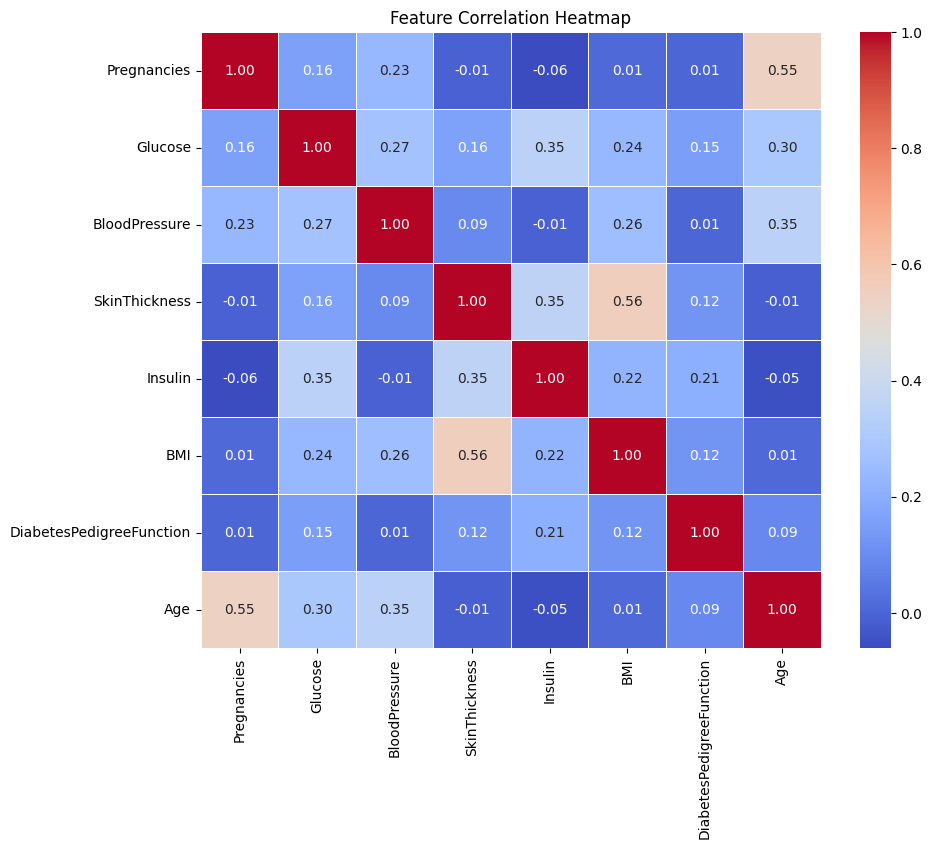

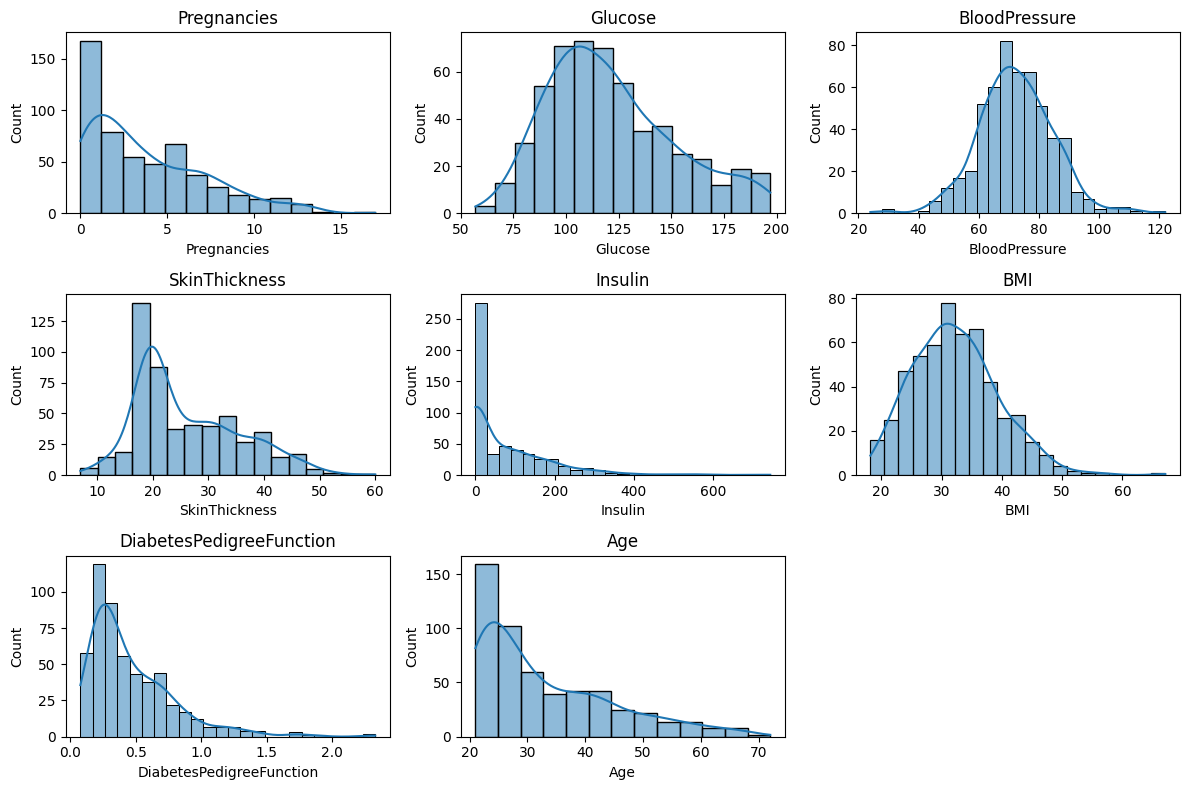

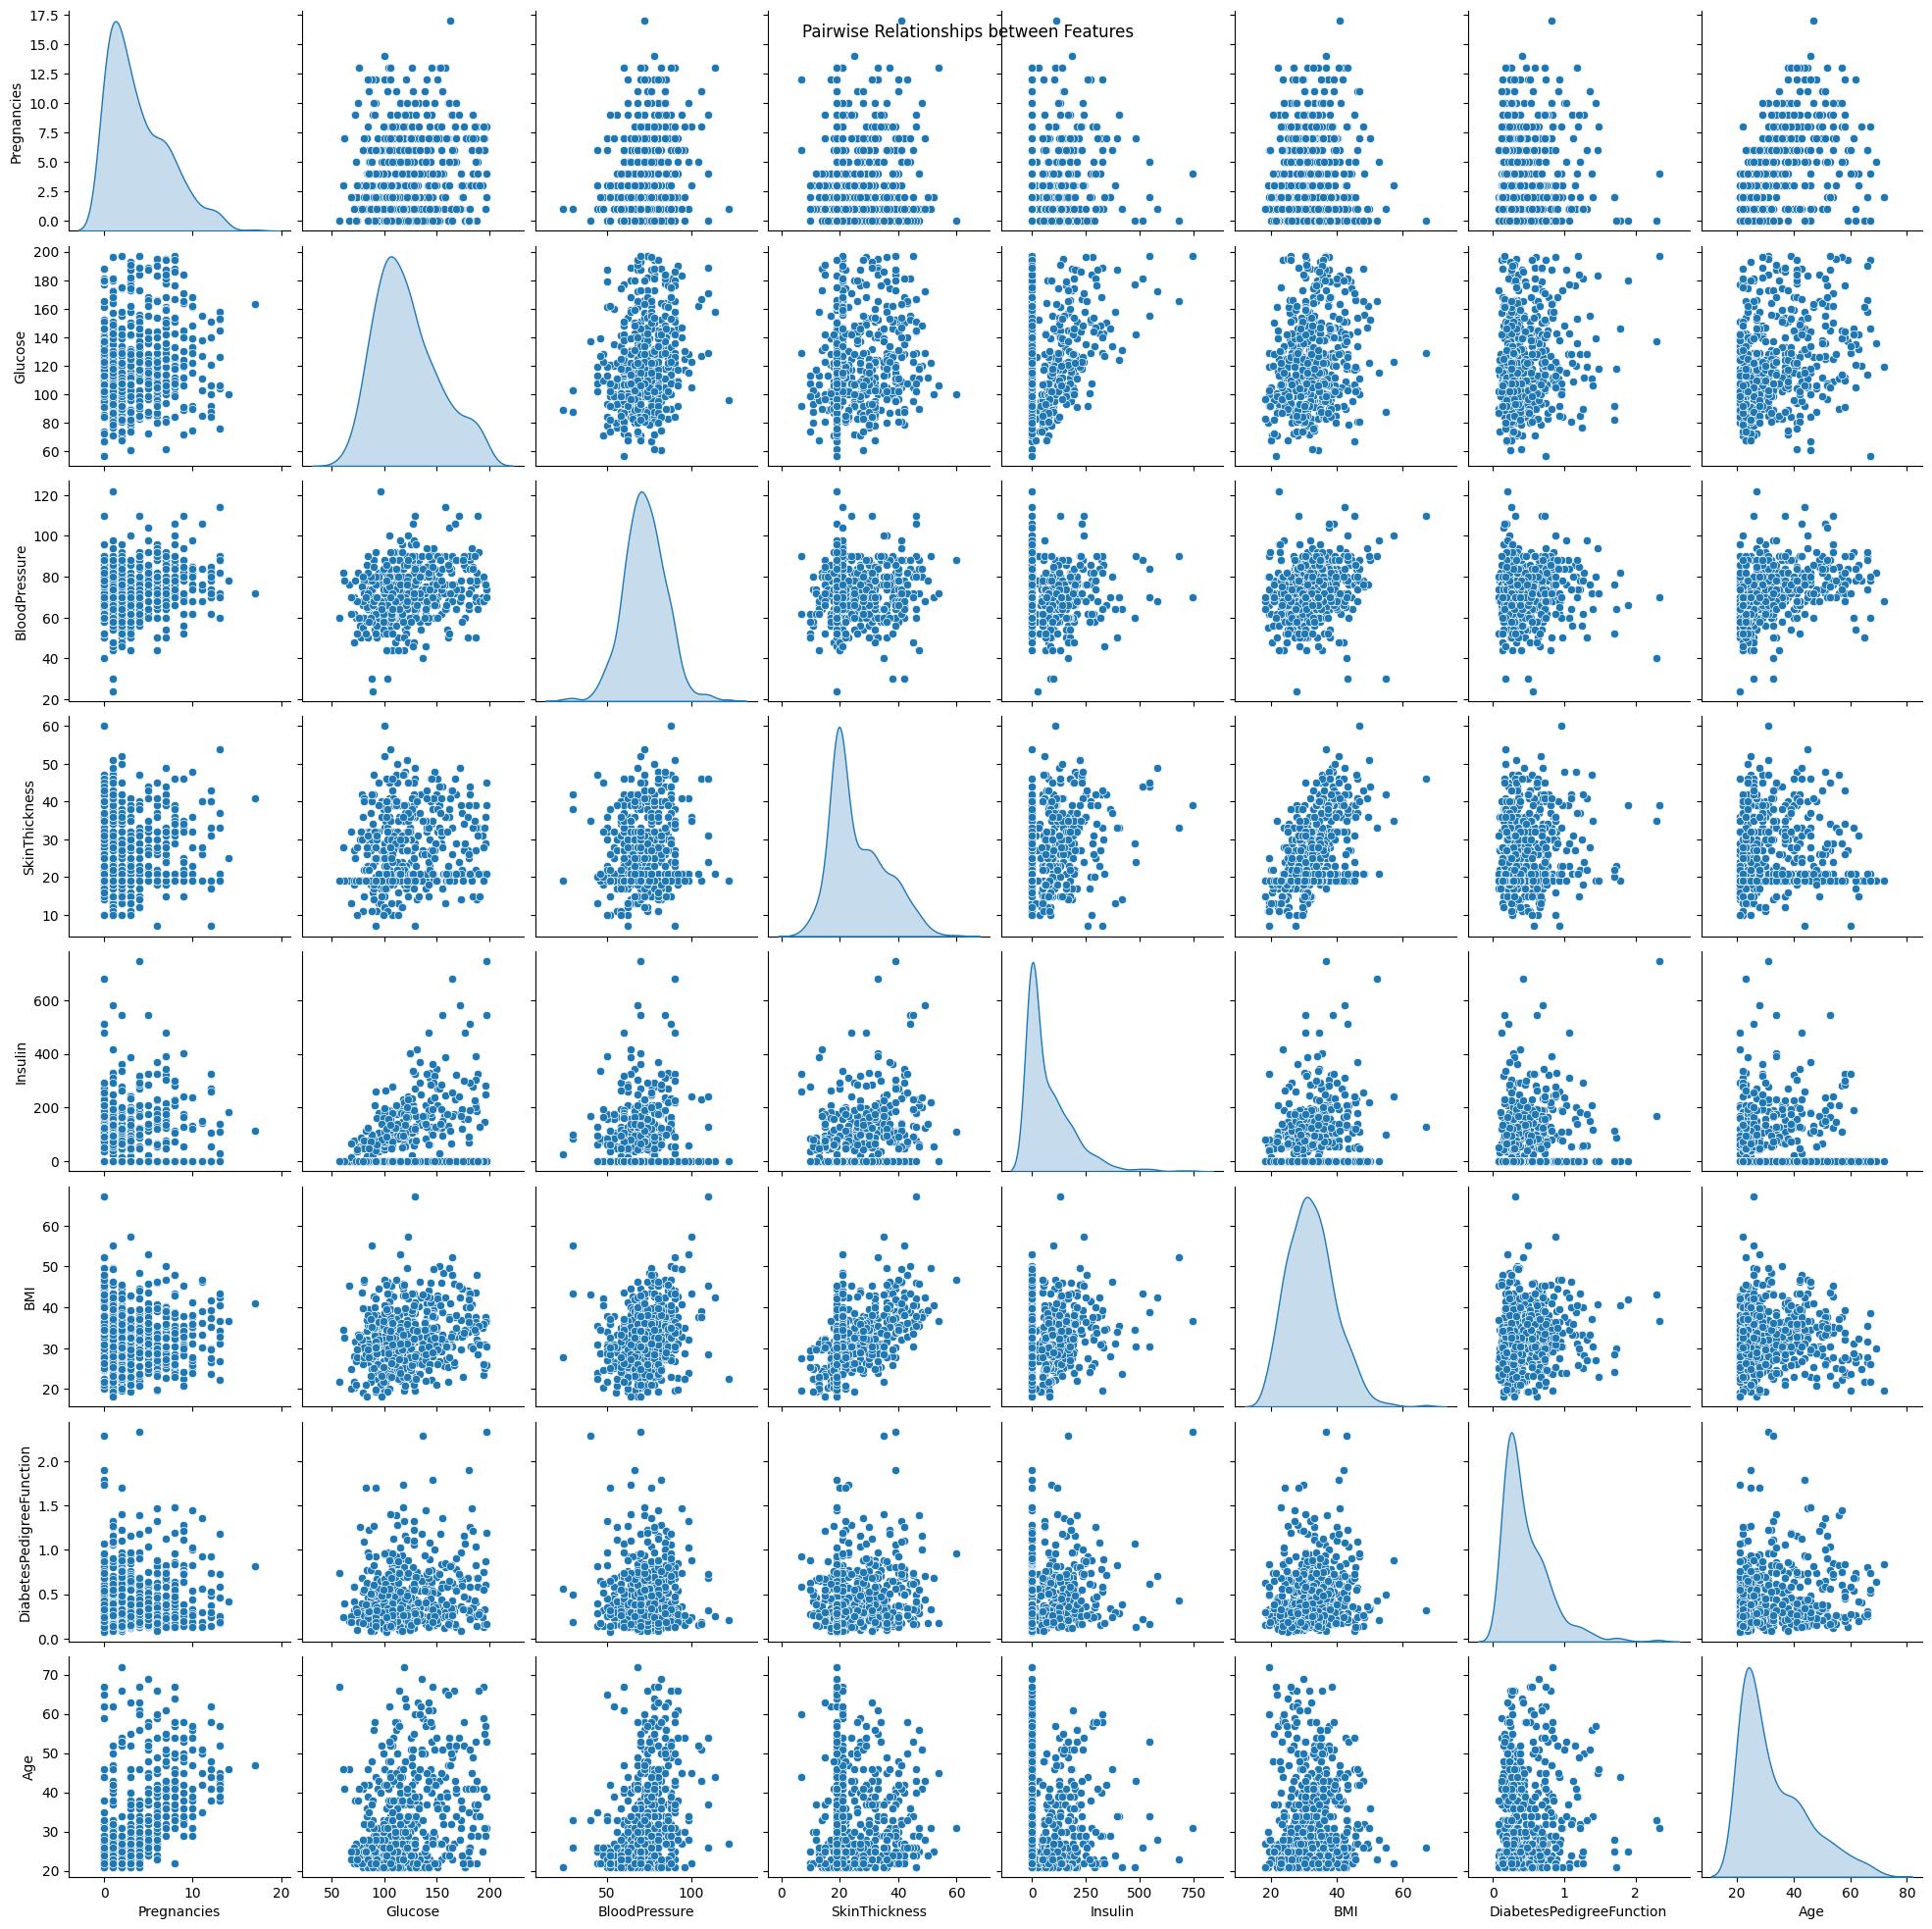

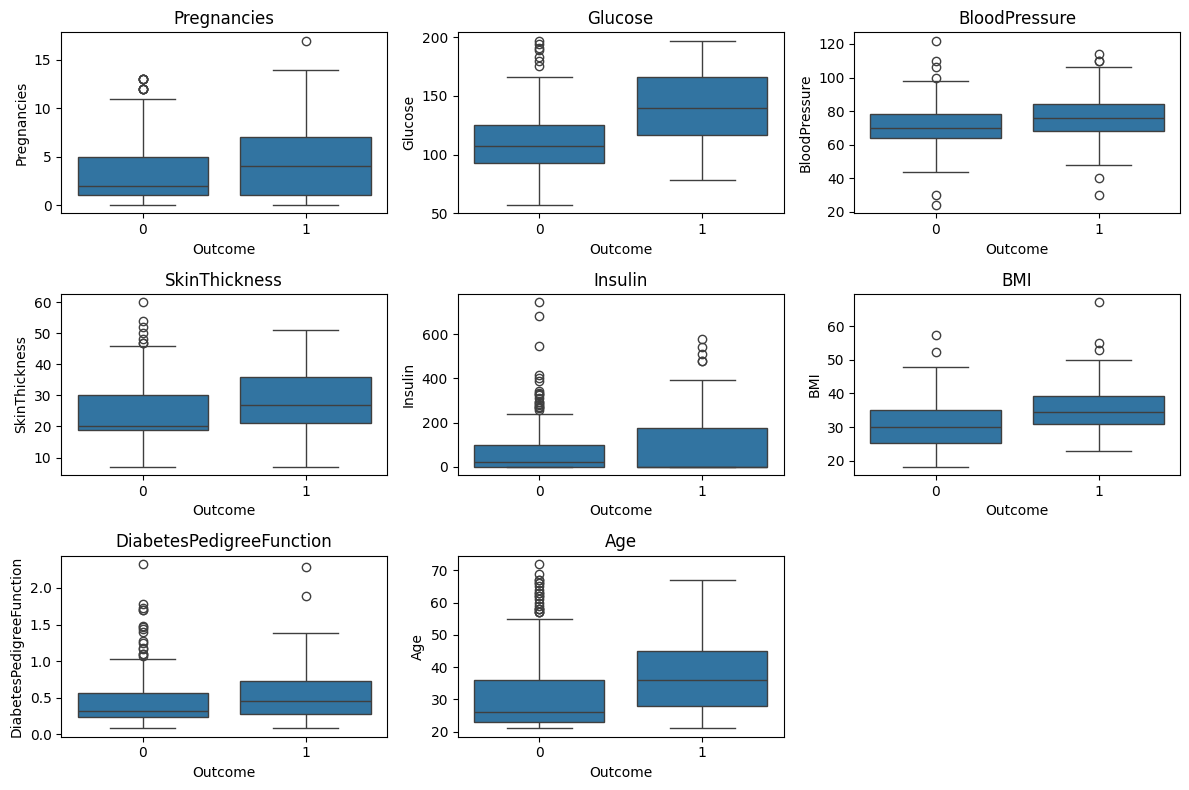

In [5]:
# Compute the correlation matrix for X_train
correlation_matrix = X_train.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Visualize the distribution of each feature in X_train
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_train.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(X_train[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Visualize pairwise relationships between features in X_train
sns.pairplot(X_train, diag_kind='kde')
plt.suptitle("Pairwise Relationships between Features")
plt.show()

# Visualize boxplots to identify outliers in X_train
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_train.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=y, y=X_train[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Selecting specific features
selected_features = ['BMI', 'Age', 'Glucose', 'BloodPressure']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train Support Vector Machine (SVM) model
svm_model = SVC(C= 1.73, kernel= 'poly',gamma='scale')
svm_model.fit(X_train_selected, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=100,criterion= 'entropy',
        min_samples_split=6, random_state=42, bootstrap= True,
        max_features=4
        )
rf_model.fit(X_train_selected, y_train)

# Train Logistic Regression model with increased max_iter
lr_model = LogisticRegression(max_iter=10000, solver='lbfgs')
lr_model.fit(X_train_selected, y_train)

# Make predictions on the test set
svm_test_pred = svm_model.predict(X_test_selected)
rf_test_pred = rf_model.predict(X_test_selected)
lr_test_pred = lr_model.predict(X_test_selected)

# Evaluate the models on the test set
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

print("Test Set Accuracy:")
print("Support Vector Machine (SVM) Accuracy:", svm_test_accuracy)
print("Random Forest Accuracy:", rf_test_accuracy)
print("Logistic Regression Accuracy:", lr_test_accuracy)


Test Set Accuracy:
Support Vector Machine (SVM) Accuracy: 0.7835497835497836
Random Forest Accuracy: 0.70995670995671
Logistic Regression Accuracy: 0.7619047619047619


In [18]:
from sklearn.metrics import classification_report

# Evaluate the models on the test set
print("Test Set Evaluation:")
print("Support Vector Machine (SVM):")
print(classification_report(y_test, svm_test_pred))

print("Random Forest:")
print(classification_report(y_test, rf_test_pred))

print("Logistic Regression:")
print(classification_report(y_test, lr_test_pred))




Test Set Evaluation:
Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       147
           1       0.77      0.57      0.66        84

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       147
           1       0.60      0.58      0.59        84

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231

Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       147
           1       0.72      0.57      0.64        84

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.